# Volcanic Forcings: 1850-2000
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
%matplotlib notebook
from geoplots import yticks2lat, xticksmonth

In [2]:
# Parameters
figname = 'figs/fig_volcanic_forcings.pdf'
data_name = 'extsw_b07'
ncfile = '/tigress/gvecchi/CM2.5/input/VOLCANIC/CMIP6/extsw_V3_DATATROP_RCP.nc'
ds = xr.open_dataset(ncfile)
da = ds[data_name].mean('lon').sum('pfull')

<IPython.core.display.Javascript object>


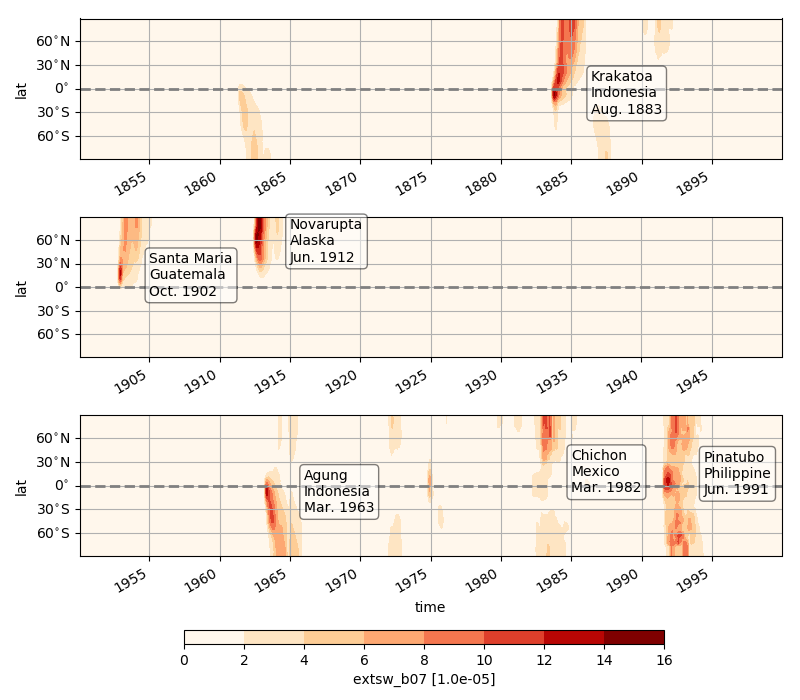

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [7]:
# CMIP6
scale_factor = 1e5
da_ = da.pipe(lambda x:x*scale_factor)
bbox = {'facecolor': 'w', 'alpha':.5, 'boxstyle': 'round'}

fig, axes = plt.subplots(3,1,figsize=(8,7), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)

plt.sca(axes[0])
da_.sel(time=slice('1850', '1899')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)

plt.title('')
plt.xlabel('time')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1886-06', -6, 'Krakatoa\nIndonesia\nAug. 1883', va='center', bbox=bbox)


plt.sca(axes[1])
da_.sel(time=slice('1900', '1949')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
plt.title('')
plt.xlabel('')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1915-01', 58, 'Novarupta\nAlaska\nJun. 1912', va='center', bbox=bbox)
plt.text('1905-01', 15, 'Santa Maria\nGuatemala\nOct. 1902', va='center', bbox=bbox)


plt.sca(axes[2])
im = da_.sel(time=slice('1950', '1999')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                      add_colorbar=False)
plt.title('')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1994-06', 15, 'Pinatubo\nPhilippine\nJun. 1991', va='center', bbox=bbox)
plt.text('1985-01', 17, 'Chichon\nMexico\nMar. 1982', va='center', bbox=bbox)
plt.text('1966-01', -8, 'Agung\nIndonesia\nMar. 1963', va='center', bbox=bbox)


yticks2lat(np.arange(-60,61,30))

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label=f'{data_name} [{1/scale_factor:.1e}]', extend='both')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, horizontalalignment='right')



plt.tight_layout(rect=(0,.1,1,1))
plt.savefig(figname)

<IPython.core.display.Javascript object>


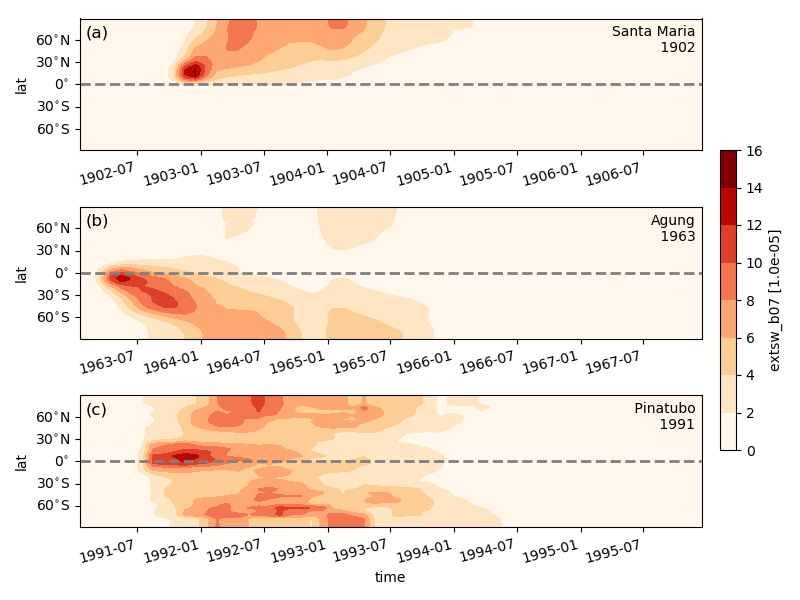

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [5]:
# 3 individual volcanic forcings
scale_factor = 1e5
fig, axes = plt.subplots(3, 1, figsize=(8,6), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(1,13,6)


plt.sca(axes[0])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1906')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(a)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1967')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Agung\n 1963', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(b)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[2])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1995')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(c)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

yticks2lat(range(-60,90,30))
for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'{data_name} [{1/scale_factor:.1e}]')

plt.tight_layout(rect=(0,0,.9,1))

plt.savefig(figname.replace('.pdf', '_SAP.pdf'))

<IPython.core.display.Javascript object>


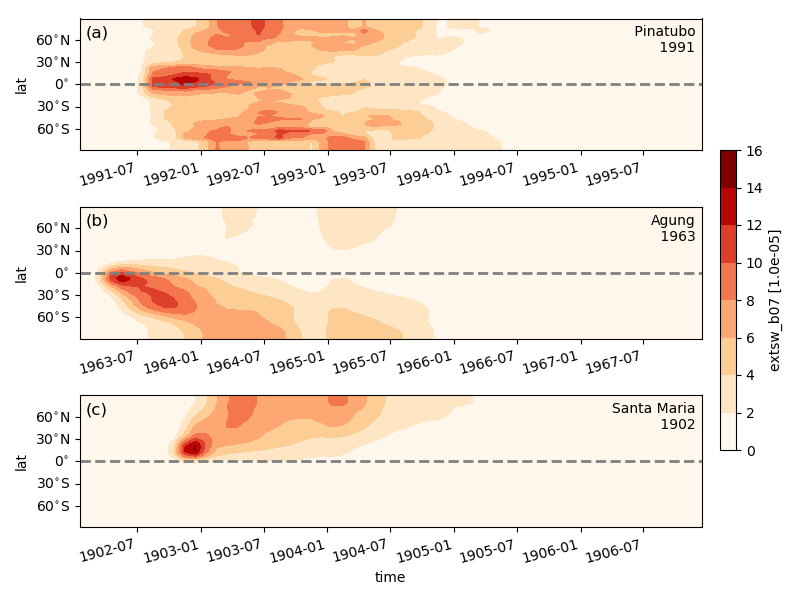

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [8]:
# 3 individual volcanic forcings: Pinatubo, Agung, Santa Maria
scale_factor = 1e5
fig, axes = plt.subplots(3, 1, figsize=(8,6), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(1,13,6)


plt.sca(axes[0])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1995')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(a)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1967')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Agung\n 1963', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(b)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[2])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1906')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(.99,.95, 'Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='right', va='top')
plt.text(.01,.95, '(c)', transform=plt.gca().transAxes, 
         ha='left', va='top', fontsize='large')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')
yticks2lat(range(-60,90,30))

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'{data_name} [{1/scale_factor:.1e}]')

plt.tight_layout(rect=(0,0,.9,1))

plt.savefig(figname.replace('.pdf', '_PAS.pdf'))

<IPython.core.display.Javascript object>


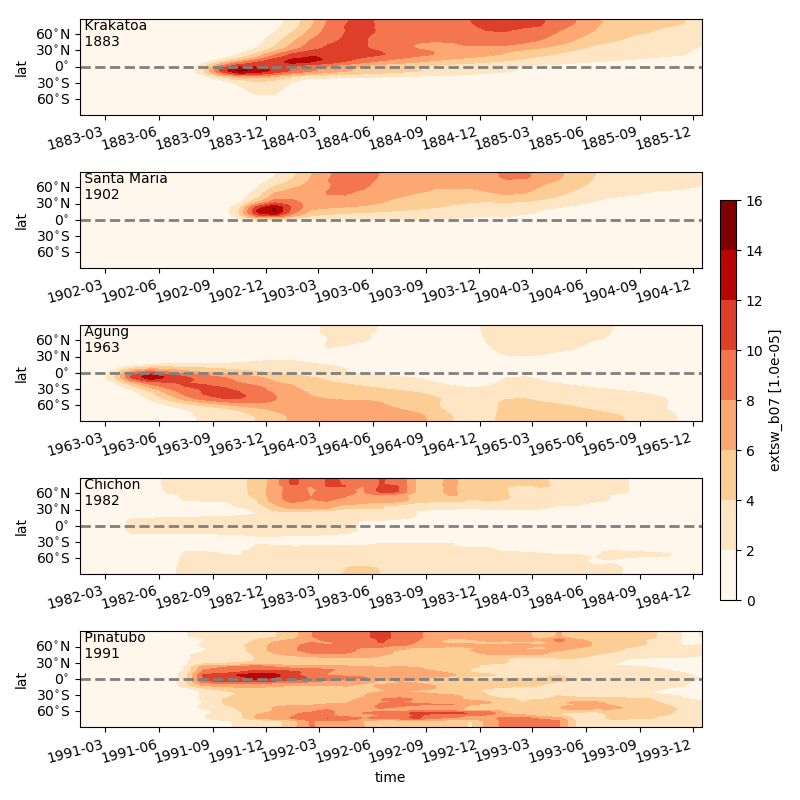

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [5]:
# 5 individual volcanic forcings
scale_factor = 1e5
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(3,13,3)

plt.sca(axes[0])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1883','1885')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Krakatoa\n 1883', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Krakatoa 1883', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[1])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1902','1904')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Santa Maria 1902', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


# plt.sca(axes[2])
# da.pipe(lambda x: x*scale_factor).sel(time=slice('1912','1914')).plot.contourf(x='time', cmap=cmap, levels=levels,
#                                                  add_colorbar=False)
# # plt.grid(True)
# plt.text(0,1, ' Novarupta\n 1912', transform=plt.gca().transAxes, 
#          ha='left', va='top')
# # plt.title('Novarupta 1912', loc='left')
# xticksmonth(monthticks)
# plt.axhline(0, color='gray', ls='--')

plt.sca(axes[2])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1963','1965')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Agung\n 1963', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Agung 1963', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

plt.sca(axes[3])
da.pipe(lambda x: x*scale_factor).sel(time=slice('1982','1984')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Chichon\n 1982', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Chichon 1982', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

plt.sca(axes[4])
im = da.pipe(lambda x: x*scale_factor).sel(time=slice('1991','1993')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='left', va='top')
# plt.title('Pinatubo 1991', loc='left')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

yticks2lat(range(-60,90,30))
for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'{data_name} [{1/scale_factor:.1e}]')

plt.tight_layout(rect=(0,0,.9,1))

# plt.savefig(figname)